# Table of Contents

1. [Introduction](#introduction)
2. [Data Profiling](#data-profiling)
    1. [Numerical Variables](#numerical-variables)

# Introduction

In this notebook, we'll be exploring some fundamental concepts of Data Science and Machine Learning. To this end, we'll be using the [**Sleep Health and Lifestyle Dataset**](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) from Kaggle. The descritpion of the dataset is the following:

### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

##### Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

---

Let's begin by importing some of the necessary libraries and importing the dataset.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

sleep_df = pd.read_csv('./sleep_health_and_lifestyle_dataset.csv', index_col='Person ID')
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Profiling
Before doing any sort of analysis, we need to obtain information about the data, evaluate the quality of the dataset, identify any problems that might have to be dealth with, and then ponder which questions may be interesting to ask and how we could get them answered.

Let's start by obtaining information about the data. One of the first questions that should be asked is: are there missing values in our data? Missing values can be a big problem, if they are very present in our dataset.

In [40]:
sleep_df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Great! There are **no missing values** in our data! This means that we won't have to bother removing columns / rows due to missing values, or imputing missing values. Now, let's get a big picture view of the remaining data. Let's start with numerical our numerical variables.

## Numerical Variables

In [58]:
import numpy as np
print(sleep_df.dtypes)
numeric_columns = sleep_df.select_dtypes([np.number]).columns
numeric_columns

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [5]:
sleep_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


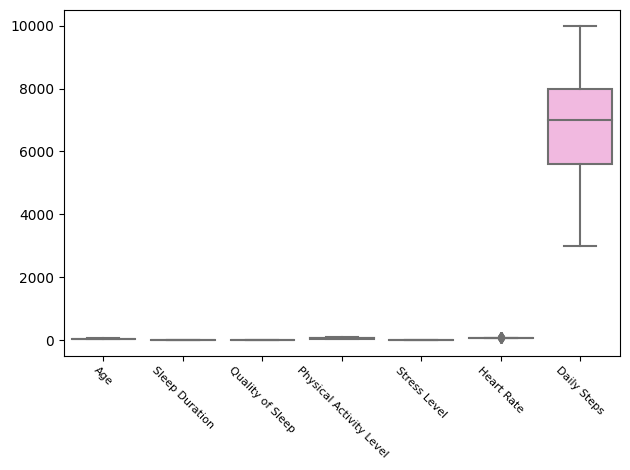

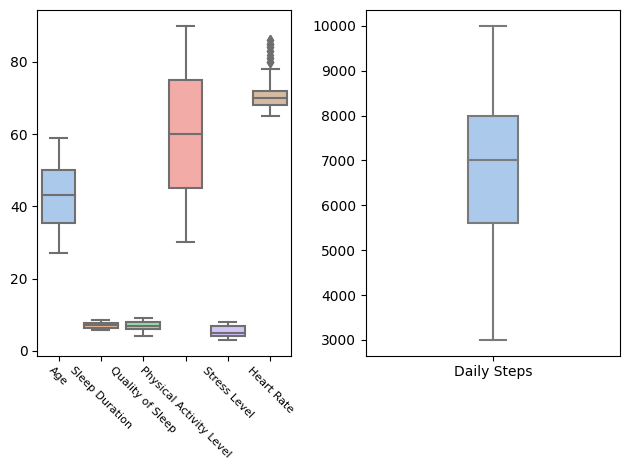

In [36]:
sns.boxplot(data=sleep_df)
plt.xticks(rotation=-45, fontsize=8)
plt.tight_layout()
plt.show()

fig, (ax0, ax1) = plt.subplots(ncols=2)
sns.boxplot(data=sleep_df.loc[:, sleep_df.columns != 'Daily Steps'], ax=ax0)
ax0.tick_params('x', labelrotation=-45, labelsize=8)

sns.boxplot(data=sleep_df.loc[:, sleep_df.columns == 'Daily Steps'], ax=ax1, width=0.2)

plt.tight_layout()
plt.show()

We can see that some numerical variables have considerably different scales. Let's use two other different boxplots: one for the Age, Physical Activity Level and Heart Rate, and another for the Sleep Duration, Quality of Sleep, and Stress Level.

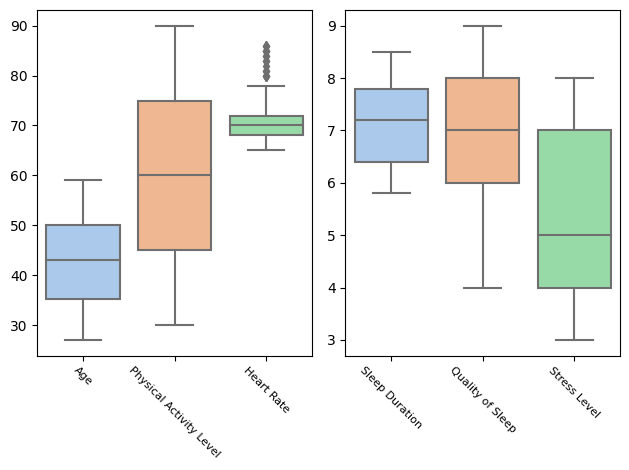

In [37]:
fig, (ax0, ax1) = plt.subplots(ncols=2)
sns.boxplot(data=sleep_df.loc[:, sleep_df.columns.isin(['Age', 'Physical Activity Level', 'Heart Rate'])], ax=ax0)
ax0.tick_params('x', labelrotation=-45, labelsize=8)

sns.boxplot(data=sleep_df.loc[:, sleep_df.columns.isin(['Sleep Duration', 'Quality of Sleep', 'Stress Level'])], ax=ax1)
ax1.tick_params('x', labelrotation=-45, labelsize=8)

plt.tight_layout()
plt.show()

From these boxplots, we can see that our numerical variables are relatively well-behaved. A few insights that we can take from these plots:

- The heart rate variable has a few outliers that go beyond the 1.5IQR $(1.5 \times (Q_3 - Q_1))$. It might be interesting to understand why these people are so different from the rest.
- The median of the Stress Level is a little bit skewed to the left, with 50% of people reporting a subjective stress level from 1 to 5. 
- We can also see that the Physical Activity Level and the Daily Steps are the variables with the highest dispersion, something that could also be seen by their standard deviation.

Let's see what the distributions of each of these variables looks like.

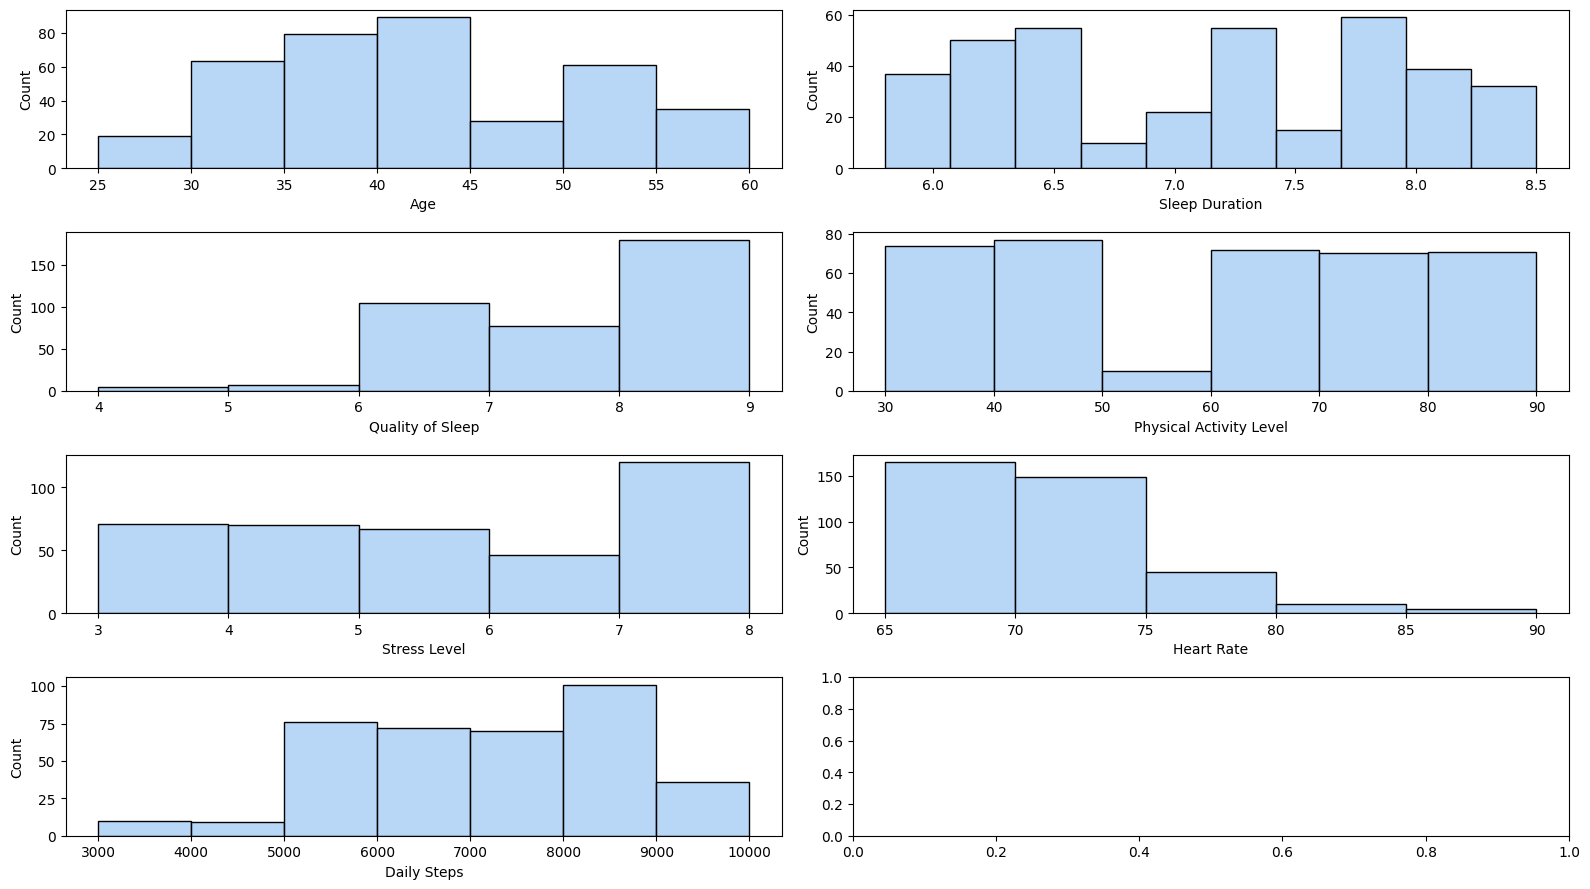

In [68]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 9))

# we need to define proper bins to get a good idea of the distribution of the data
bins = [np.arange(25, 61, 5),           # age
        'auto',                         # sleep duration
        np.arange(4, 10),               # qos
        np.arange(30, 91, 10),          # pal
        np.arange(3, 9),                # sl
        np.arange(65, 91, 5),           # hr
        np.arange(3000, 10001, 1000)    # ds
        ]

ax = ax.flatten()

for i in range(len(ax) - 1):
    sns.histplot(data=sleep_df[numeric_columns[i]], ax=ax[i], bins=bins[i])

plt.tight_layout()

Here, we see that the amount of registries we have for each of our variables is generally well distributed along the domain of each feature. However, we have to take a few things into account: for example, many of the registers we have of the heart rate variable are skewed to the left (i.e., between 65 and 75). Physical Activity Level, on the other hand, is pretty much evenly distributed if we bin it with bins of size 10, with only a very small number of registers for physical activity levels between 50 and 60. Lower counts for certain ranges of values will mean that our models will have less opportunities to properly learn how to predict what we want them to predict when these ranges are fed as input.